<a href="https://colab.research.google.com/github/Rushinalawade/Cricket-Score-Card-T20-World-Cup/blob/main/Cricket_Score_Card_T20_World_Cup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Notebook/International_T20_Data.csv')
df.head()

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,...,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
0,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-18,2,"[datetime.date(2017, 2, 17)]",male,T20,5.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-19,2,"[datetime.date(2017, 2, 19)]",male,T20,2.0,Sri Lanka,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2017-02-23,1,"[datetime.date(2017, 2, 22)]",male,T20,NaN,Australia,20,...,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'1st innings': {'team': 'Hong Kong', 'delive...",0.9,2016-09-12,1,"[datetime.date(2016, 9, 5)]",male,T20,NaN,Hong Kong,20,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'1st innings': {'team': 'Zimbabwe', 'deliver...",0.9,2016-06-19,1,"[datetime.date(2016, 6, 18)]",male,T20,NaN,Zimbabwe,20,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,meta.data_version,meta.revision,info.outcome.by.wickets,info.overs,info.outcome.by.runs,info.match_type_number,info.neutral_venue
count,1.417000e+03,1417.000000,651.000000,1417.000000,721.000000,684.000000,328.0
mean,9.000000e-01,1.370501,6.476190,20.063514,39.088766,748.774854,1.0
std,1.110615e-16,0.575198,1.987802,1.379399,33.385757,190.050264,0.0
min,9.000000e-01,1.000000,1.000000,20.000000,1.000000,380.000000,1.0
25%,9.000000e-01,1.000000,5.000000,20.000000,13.000000,627.000000,1.0
50%,9.000000e-01,1.000000,7.000000,20.000000,30.000000,746.500000,1.0
75%,9.000000e-01,2.000000,8.000000,20.000000,56.000000,883.250000,1.0
max,9.000000e-01,5.000000,10.000000,50.000000,249.000000,1104.000000,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   innings                      1417 non-null   object 
 1   meta.data_version            1417 non-null   float64
 2   meta.created                 1417 non-null   object 
 3   meta.revision                1417 non-null   int64  
 4   info.dates                   1417 non-null   object 
 5   info.gender                  1417 non-null   object 
 6   info.match_type              1417 non-null   object 
 7   info.outcome.by.wickets      651 non-null    float64
 8   info.outcome.winner          1372 non-null   object 
 9   info.overs                   1417 non-null   int64  
 10  info.player_of_match         1255 non-null   object 
 11  info.teams                   1417 non-null   object 
 12  info.toss.decision           1417 non-null   object 
 13  info.toss.winner  

In [ ]:
df['info.match_type_number'].value_counts()

753.0    3
851.0    2
857.0    2
763.0    2
758.0    2
        ..
704.0    1
702.0    1
508.0    1
504.0    1
380.0    1
Name: info.match_type_number, Length: 567, dtype: int64

In [ ]:
df[~df['info.outcome.bowl_out'].isnull()]

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,...,info.outcome.by.runs,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out
748,"[{'1st innings': {'team': 'West Indies', 'deli...",0.9,2013-02-20,2,"[datetime.date(2006, 2, 16)]",male,T20,NaN,NaN,20,...,NaN,NaN,NaN,NaN,tie,NaN,NaN,NaN,"[{'bowler': 'NJ Astle', 'outcome': 'miss'}, {'...",New Zealand
764,"[{'1st innings': {'team': 'India', 'deliveries...",0.9,2013-02-19,1,"[datetime.date(2007, 9, 14)]",male,T20,NaN,NaN,20,...,NaN,NaN,1.0,NaN,tie,NaN,NaN,NaN,"[{'bowler': 'V Sehwag', 'outcome': 'hit'}, {'b...",India


In [ ]:
def str_to_date(sms):
  if('2007' in sms):
    new_dict = {'datetime.date':'', '[':'', ']':'', '(':'', ')':'', ' ':'',"'":''}
    for i in new_dict.keys():
      sms = sms.replace(i,new_dict[i])
    date_object = datetime.strptime(sms, '%Y,%m,%d').date()
    return date_object

In [ ]:
df['date'] = df['info.dates'].apply(lambda x: str_to_date(x))

In [ ]:
match_df = df[~df['date'].isnull()]
match_df

,innings,meta.data_version,meta.created,meta.revision,info.dates,info.gender,info.match_type,info.outcome.by.wickets,info.outcome.winner,info.overs,...,info.match_type_number,info.neutral_venue,info.outcome.method,info.outcome.result,info.outcome.eliminator,info.supersubs.New Zealand,info.supersubs.South Africa,info.bowl_out,info.outcome.bowl_out,date
750,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2013-02-18,1,"[datetime.date(2007, 1, 9)]",male,T20,NaN,Australia,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-09
754,"[{'1st innings': {'team': 'West Indies', 'deli...",0.9,2013-02-18,1,"[datetime.date(2007, 6, 28)]",male,T20,NaN,West Indies,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-06-28
755,"[{'1st innings': {'team': 'West Indies', 'deli...",0.9,2013-02-18,1,"[datetime.date(2007, 6, 29)]",male,T20,5.0,England,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-06-29
756,"[{'1st innings': {'team': 'West Indies', 'deli...",0.9,2013-02-18,1,"[datetime.date(2007, 9, 11)]",male,T20,8.0,South Africa,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-09-11
757,"[{'1st innings': {'team': 'Kenya', 'deliveries...",0.9,2013-02-18,1,"[datetime.date(2007, 9, 12)]",male,T20,9.0,New Zealand,20,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-09-12
758,"[{'1st innings': {'team': 'Pakistan', 'deliver...",0.9,2013-02-18,1,"[datetime.date(2007, 9, 12)]",male,T20,NaN,Pakistan,20,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-09-12
759,"[{'1st innings': {'team': 'Australia', 'delive...",0.9,2013-02-18,1,"[datetime.date(2007, 9, 12)]",male,T20,5.0,Zimbabwe,20,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-09-12
760,"[{'1st innings': {'team': 'West Indies', 'deli...",0.9,2013-02-18,1,"[datetime.date(2007, 9, 13)]",male,T20,6.0,Bangladesh,20,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-09-13
761,"[{'1st innings': {'team': 'England', 'deliveri...",0.9,2013-02-18,1,"[datetime.date(2007, 9, 13)]",male,T20,NaN,England,20,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-09-13
762,"[{'1st innings': {'team': 'Sri Lanka', 'delive...",0.9,2013-02-19,1,"[datetime.date(2007, 9, 14)]",male,T20,NaN,Sri Lanka,20,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-09-14


In [ ]:
match_df['date'] = match_df['date'].astype('datetime64[ns]')

In [ ]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 750 to 793
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   innings                      36 non-null     object        
 1   meta.data_version            36 non-null     float64       
 2   meta.created                 36 non-null     object        
 3   meta.revision                36 non-null     int64         
 4   info.dates                   36 non-null     object        
 5   info.gender                  36 non-null     object        
 6   info.match_type              36 non-null     object        
 7   info.outcome.by.wickets      19 non-null     float64       
 8   info.outcome.winner          35 non-null     object        
 9   info.overs                   36 non-null     int64         
 10  info.player_of_match         36 non-null     object        
 11  info.teams                   36 non-null    

In [ ]:
match_df = match_df[match_df['date']<'2007-09-25']
match_df = match_df[match_df['date']>='2007-09-11']

In [ ]:
match_df = match_df[['innings','info.teams','info.outcome.by.wickets','info.outcome.winner','info.outcome.by.runs','date']]
match_df = match_df.reset_index(drop=True)

In [ ]:
match_df

,innings,info.teams,info.outcome.by.wickets,info.outcome.winner,info.outcome.by.runs,date
0,"[{'1st innings': {'team': 'West Indies', 'deli...","['South Africa', 'West Indies']",8.0,South Africa,NaN,2007-09-11
1,"[{'1st innings': {'team': 'Kenya', 'deliveries...","['Kenya', 'New Zealand']",9.0,New Zealand,NaN,2007-09-12
2,"[{'1st innings': {'team': 'Pakistan', 'deliver...","['Pakistan', 'Scotland']",NaN,Pakistan,51.0,2007-09-12
3,"[{'1st innings': {'team': 'Australia', 'delive...","['Australia', 'Zimbabwe']",5.0,Zimbabwe,NaN,2007-09-12
4,"[{'1st innings': {'team': 'West Indies', 'deli...","['Bangladesh', 'West Indies']",6.0,Bangladesh,NaN,2007-09-13
5,"[{'1st innings': {'team': 'England', 'deliveri...","['England', 'Zimbabwe']",NaN,England,50.0,2007-09-13
6,"[{'1st innings': {'team': 'Sri Lanka', 'delive...","['Kenya', 'Sri Lanka']",NaN,Sri Lanka,172.0,2007-09-14
7,"[{'1st innings': {'team': 'England', 'deliveri...","['Australia', 'England']",8.0,Australia,NaN,2007-09-14
8,"[{'1st innings': {'team': 'India', 'deliveries...","['India', 'Pakistan']",NaN,NaN,NaN,2007-09-14
9,"[{'1st innings': {'team': 'New Zealand', 'deli...","['New Zealand', 'Sri Lanka']",7.0,Sri Lanka,NaN,2007-09-15


In [ ]:
for index,rows in match_df.iterrows():
  match_df.loc[index,'team_id'] = ' VS '.join(eval(rows['info.teams'])) + ' : ' + str(rows['date'].date())

In [ ]:
match_df1 = match_df[['team_id','date','info.outcome.by.wickets','info.outcome.winner','info.outcome.by.runs']]

In [ ]:
match_df

,innings,info.teams,info.outcome.by.wickets,info.outcome.winner,info.outcome.by.runs,date,team_id
0,"[{'1st innings': {'team': 'West Indies', 'deli...","['South Africa', 'West Indies']",8.0,South Africa,NaN,2007-09-11,South Africa VS West Indies : 2007-09-11
1,"[{'1st innings': {'team': 'Kenya', 'deliveries...","['Kenya', 'New Zealand']",9.0,New Zealand,NaN,2007-09-12,Kenya VS New Zealand : 2007-09-12
2,"[{'1st innings': {'team': 'Pakistan', 'deliver...","['Pakistan', 'Scotland']",NaN,Pakistan,51.0,2007-09-12,Pakistan VS Scotland : 2007-09-12
3,"[{'1st innings': {'team': 'Australia', 'delive...","['Australia', 'Zimbabwe']",5.0,Zimbabwe,NaN,2007-09-12,Australia VS Zimbabwe : 2007-09-12
4,"[{'1st innings': {'team': 'West Indies', 'deli...","['Bangladesh', 'West Indies']",6.0,Bangladesh,NaN,2007-09-13,Bangladesh VS West Indies : 2007-09-13
5,"[{'1st innings': {'team': 'England', 'deliveri...","['England', 'Zimbabwe']",NaN,England,50.0,2007-09-13,England VS Zimbabwe : 2007-09-13
6,"[{'1st innings': {'team': 'Sri Lanka', 'delive...","['Kenya', 'Sri Lanka']",NaN,Sri Lanka,172.0,2007-09-14,Kenya VS Sri Lanka : 2007-09-14
7,"[{'1st innings': {'team': 'England', 'deliveri...","['Australia', 'England']",8.0,Australia,NaN,2007-09-14,Australia VS England : 2007-09-14
8,"[{'1st innings': {'team': 'India', 'deliveries...","['India', 'Pakistan']",NaN,NaN,NaN,2007-09-14,India VS Pakistan : 2007-09-14
9,"[{'1st innings': {'team': 'New Zealand', 'deli...","['New Zealand', 'Sri Lanka']",7.0,Sri Lanka,NaN,2007-09-15,New Zealand VS Sri Lanka : 2007-09-15


In [ ]:
ddf = pd.DataFrame()
for index,row in match_df.iterrows():
  match_info = eval(match_df.iloc[index,0])

  # Creating DataFrame for '1st innings:
  ddf1 = pd.DataFrame()
  for i in match_info[0]['1st innings']['deliveries']:
    dfi = pd.DataFrame(i)
    dfi = dfi.transpose()
    ddf1 = ddf1.append(dfi)
  ddf1 = ddf1.reset_index()
  ddf1['team'] = match_info[0]['1st innings']['team']
  ddf1['team_id'] = match_df.loc[index,'team_id']

  # Creating DataFrame for 2nd Innings:
  ddf2 = pd.DataFrame()
  for i in match_info[1]['2nd innings']['deliveries']:
    dfi = pd.DataFrame(i)
    dfi = dfi.transpose()
    ddf2 = ddf2.append(dfi)
  ddf2 = ddf2.reset_index()
  ddf2['team'] = match_info[1]['2nd innings']['team']
  ddf2['team_id'] = match_df.loc[index,'team_id']

  # Merging the two innings:
  ddf3 = pd.concat([ddf1,ddf2])
  ddf3.reset_index(inplace=True,drop=True)
  ddf3 = ddf3[['team_id','team','index','batsman','bowler','non_striker','runs','extras','wicket']]

  # Merge with main DataFrame:
  ddf = pd.concat([ddf,ddf3])
  ddf.reset_index(inplace=True,drop=True)

In [ ]:
ddf

,team_id,team,index,batsman,bowler,non_striker,runs,extras,wicket
0,South Africa VS West Indies : 2007-09-11,West Indies,0.1,CH Gayle,SM Pollock,DS Smith,"{'batsman': 4, 'extras': 0, 'total': 4}",NaN,NaN
1,South Africa VS West Indies : 2007-09-11,West Indies,0.2,CH Gayle,SM Pollock,DS Smith,"{'batsman': 0, 'extras': 0, 'total': 0}",NaN,NaN
2,South Africa VS West Indies : 2007-09-11,West Indies,0.3,CH Gayle,SM Pollock,DS Smith,"{'batsman': 1, 'extras': 0, 'total': 1}",NaN,NaN
3,South Africa VS West Indies : 2007-09-11,West Indies,0.4,DS Smith,SM Pollock,CH Gayle,"{'batsman': 1, 'extras': 0, 'total': 1}",NaN,NaN
4,South Africa VS West Indies : 2007-09-11,West Indies,0.5,CH Gayle,SM Pollock,DS Smith,"{'batsman': 2, 'extras': 0, 'total': 2}",NaN,NaN
...,...,...,...,...,...,...,...,...,...
6165,India VS Pakistan : 2007-09-24,Pakistan,18.6,Mohammad Asif,RP Singh,Misbah-ul-Haq,"{'batsman': 4, 'extras': 0, 'total': 4}",NaN,NaN
6166,India VS Pakistan : 2007-09-24,Pakistan,19.1,Misbah-ul-Haq,Joginder Sharma,Mohammad Asif,"{'batsman': 0, 'extras': 1, 'total': 1}",{'wides': 1},NaN
6167,India VS Pakistan : 2007-09-24,Pakistan,19.2,Misbah-ul-Haq,Joginder Sharma,Mohammad Asif,"{'batsman': 0, 'extras': 0, 'total': 0}",NaN,NaN
6168,India VS Pakistan : 2007-09-24,Pakistan,19.3,Misbah-ul-Haq,Joginder Sharma,Mohammad Asif,"{'batsman': 6, 'extras': 0, 'total': 6}",NaN,NaN


In [ ]:
# DataFrame for 1st inning
# ddf1 = pd.DataFrame()
# for i in match_info[0]['1st innings']['deliveries']:
#   dfi = pd.DataFrame(i)
#   dfi = dfi.transpose()
#   ddf1 = ddf1.append(dfi)
# ddf1 = ddf1.reset_index()
# ddf1['team'] = match_info[0]['1st innings']['team']
# ddf1['team_id'] = match_df.loc[0,'team_id']
# ddf1

In [ ]:
# DataFrame for 2nd inning
# ddf2 = pd.DataFrame()
# for i in match_info[1]['2nd innings']['deliveries']:
#   dfi = pd.DataFrame(i)
#   dfi = dfi.transpose()
#   ddf2 = ddf2.append(dfi)
# ddf2 = ddf2.reset_index()
# ddf2['team'] = match_info[1]['2nd innings']['team']
# ddf2['team_id'] = match_df.loc[0,'team_id']
# ddf2

In [ ]:
# Merge 1st and 2nd innings:
# ddf = pd.concat([ddf1,ddf2])
# ddf.reset_index(inplace=True,drop=True)
# ddf = ddf[['team_id','team','index','batsman','bowler','non_striker','runs','extras','wicket']]
# ddf

In [ ]:
# Converting dictionary row element into columns:
run_df = pd.DataFrame()
wikt_df = pd.DataFrame()
for index,row in ddf.iterrows():
  new = pd.DataFrame([row['runs']])
  wikt = pd.DataFrame([row['wicket']])
  run_df = run_df.append(new)
  wikt_df = wikt_df.append(wikt)
run_df  = run_df.reset_index()
wikt_df = wikt_df.reset_index()

In [ ]:
run_df = run_df[['batsman','extras','total']]
run_df

,batsman,extras,total
0,4,0,4
1,0,0,0
2,1,0,1
3,1,0,1
4,2,0,2
...,...,...,...
6165,4,0,4
6166,0,1,1
6167,0,0,0
6168,6,0,6


In [ ]:
wikt_df = wikt_df[['kind','player_out','fielders']]
wikt_df

,kind,player_out,fielders
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
6165,NaN,NaN,NaN
6166,NaN,NaN,NaN
6167,NaN,NaN,NaN
6168,NaN,NaN,NaN


In [ ]:
# Concating run_df and wikt_df with ddf:
ddf = pd.concat([ddf,run_df,wikt_df],axis=1)
ddf

,team_id,team,index,batsman,bowler,non_striker,runs,extras,wicket,batsman,extras,total,kind,player_out,fielders
0,South Africa VS West Indies : 2007-09-11,West Indies,0.1,CH Gayle,SM Pollock,DS Smith,"{'batsman': 4, 'extras': 0, 'total': 4}",NaN,NaN,4,0,4,NaN,NaN,NaN
1,South Africa VS West Indies : 2007-09-11,West Indies,0.2,CH Gayle,SM Pollock,DS Smith,"{'batsman': 0, 'extras': 0, 'total': 0}",NaN,NaN,0,0,0,NaN,NaN,NaN
2,South Africa VS West Indies : 2007-09-11,West Indies,0.3,CH Gayle,SM Pollock,DS Smith,"{'batsman': 1, 'extras': 0, 'total': 1}",NaN,NaN,1,0,1,NaN,NaN,NaN
3,South Africa VS West Indies : 2007-09-11,West Indies,0.4,DS Smith,SM Pollock,CH Gayle,"{'batsman': 1, 'extras': 0, 'total': 1}",NaN,NaN,1,0,1,NaN,NaN,NaN
4,South Africa VS West Indies : 2007-09-11,West Indies,0.5,CH Gayle,SM Pollock,DS Smith,"{'batsman': 2, 'extras': 0, 'total': 2}",NaN,NaN,2,0,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,India VS Pakistan : 2007-09-24,Pakistan,18.6,Mohammad Asif,RP Singh,Misbah-ul-Haq,"{'batsman': 4, 'extras': 0, 'total': 4}",NaN,NaN,4,0,4,NaN,NaN,NaN
6166,India VS Pakistan : 2007-09-24,Pakistan,19.1,Misbah-ul-Haq,Joginder Sharma,Mohammad Asif,"{'batsman': 0, 'extras': 1, 'total': 1}",{'wides': 1},NaN,0,1,1,NaN,NaN,NaN
6167,India VS Pakistan : 2007-09-24,Pakistan,19.2,Misbah-ul-Haq,Joginder Sharma,Mohammad Asif,"{'batsman': 0, 'extras': 0, 'total': 0}",NaN,NaN,0,0,0,NaN,NaN,NaN
6168,India VS Pakistan : 2007-09-24,Pakistan,19.3,Misbah-ul-Haq,Joginder Sharma,Mohammad Asif,"{'batsman': 6, 'extras': 0, 'total': 6}",NaN,NaN,6,0,6,NaN,NaN,NaN


In [ ]:
#Renaming the columns:
col_name = ['match_id','team','bowl','batsman','bowler','non_striker','runs','eextras','wicket','bats_run','extras','total','kind','player_out','fielders']
ddf.columns = col_name
ddf

,match_id,team,bowl,batsman,bowler,non_striker,runs,eextras,wicket,bats_run,extras,total,kind,player_out,fielders
0,South Africa VS West Indies : 2007-09-11,West Indies,0.1,CH Gayle,SM Pollock,DS Smith,"{'batsman': 4, 'extras': 0, 'total': 4}",NaN,NaN,4,0,4,NaN,NaN,NaN
1,South Africa VS West Indies : 2007-09-11,West Indies,0.2,CH Gayle,SM Pollock,DS Smith,"{'batsman': 0, 'extras': 0, 'total': 0}",NaN,NaN,0,0,0,NaN,NaN,NaN
2,South Africa VS West Indies : 2007-09-11,West Indies,0.3,CH Gayle,SM Pollock,DS Smith,"{'batsman': 1, 'extras': 0, 'total': 1}",NaN,NaN,1,0,1,NaN,NaN,NaN
3,South Africa VS West Indies : 2007-09-11,West Indies,0.4,DS Smith,SM Pollock,CH Gayle,"{'batsman': 1, 'extras': 0, 'total': 1}",NaN,NaN,1,0,1,NaN,NaN,NaN
4,South Africa VS West Indies : 2007-09-11,West Indies,0.5,CH Gayle,SM Pollock,DS Smith,"{'batsman': 2, 'extras': 0, 'total': 2}",NaN,NaN,2,0,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6165,India VS Pakistan : 2007-09-24,Pakistan,18.6,Mohammad Asif,RP Singh,Misbah-ul-Haq,"{'batsman': 4, 'extras': 0, 'total': 4}",NaN,NaN,4,0,4,NaN,NaN,NaN
6166,India VS Pakistan : 2007-09-24,Pakistan,19.1,Misbah-ul-Haq,Joginder Sharma,Mohammad Asif,"{'batsman': 0, 'extras': 1, 'total': 1}",{'wides': 1},NaN,0,1,1,NaN,NaN,NaN
6167,India VS Pakistan : 2007-09-24,Pakistan,19.2,Misbah-ul-Haq,Joginder Sharma,Mohammad Asif,"{'batsman': 0, 'extras': 0, 'total': 0}",NaN,NaN,0,0,0,NaN,NaN,NaN
6168,India VS Pakistan : 2007-09-24,Pakistan,19.3,Misbah-ul-Haq,Joginder Sharma,Mohammad Asif,"{'batsman': 6, 'extras': 0, 'total': 6}",NaN,NaN,6,0,6,NaN,NaN,NaN


In [ ]:
# Droppping unwanted columns:
ddf.drop(columns={'runs','wicket'},inplace=True)
ddf.head(20)

,match_id,team,bowl,batsman,bowler,non_striker,eextras,bats_run,extras,total,kind,player_out,fielders
0,South Africa VS West Indies : 2007-09-11,West Indies,0.1,CH Gayle,SM Pollock,DS Smith,NaN,4,0,4,NaN,NaN,NaN
1,South Africa VS West Indies : 2007-09-11,West Indies,0.2,CH Gayle,SM Pollock,DS Smith,NaN,0,0,0,NaN,NaN,NaN
2,South Africa VS West Indies : 2007-09-11,West Indies,0.3,CH Gayle,SM Pollock,DS Smith,NaN,1,0,1,NaN,NaN,NaN
3,South Africa VS West Indies : 2007-09-11,West Indies,0.4,DS Smith,SM Pollock,CH Gayle,NaN,1,0,1,NaN,NaN,NaN
4,South Africa VS West Indies : 2007-09-11,West Indies,0.5,CH Gayle,SM Pollock,DS Smith,NaN,2,0,2,NaN,NaN,NaN
5,South Africa VS West Indies : 2007-09-11,West Indies,0.6,CH Gayle,SM Pollock,DS Smith,NaN,0,0,0,NaN,NaN,NaN
6,South Africa VS West Indies : 2007-09-11,West Indies,1.1,DS Smith,M Ntini,CH Gayle,NaN,1,0,1,NaN,NaN,NaN
7,South Africa VS West Indies : 2007-09-11,West Indies,1.2,CH Gayle,M Ntini,DS Smith,NaN,1,0,1,NaN,NaN,NaN
8,South Africa VS West Indies : 2007-09-11,West Indies,1.3,DS Smith,M Ntini,CH Gayle,NaN,0,0,0,NaN,NaN,NaN
9,South Africa VS West Indies : 2007-09-11,West Indies,1.4,DS Smith,M Ntini,CH Gayle,NaN,0,0,0,NaN,NaN,NaN


In [ ]:
# Extracting dictionary keys from eextras columns (e.g : wides,legbyes,no ball, etc)
ddf.loc[~(ddf['eextras'].isna()),'eextras'] = ddf.loc[~(ddf['eextras'].isna()),'eextras'].apply(lambda c: list(c.items())[0][0])

In [ ]:
# Wickets of all batsman in tournament
ddf[~(ddf['kind'].isnull())]

,match_id,team,bowl,batsman,bowler,non_striker,eextras,bats_run,extras,total,kind,player_out,fielders
85,South Africa VS West Indies : 2007-09-11,West Indies,13.3,DS Smith,VD Philander,CH Gayle,NaN,0,0,0,caught,DS Smith,[MV Boucher]
90,South Africa VS West Indies : 2007-09-11,West Indies,14.2,MN Samuels,SM Pollock,CH Gayle,NaN,0,0,0,caught,MN Samuels,[AB de Villiers]
106,South Africa VS West Indies : 2007-09-11,West Indies,16.2,CH Gayle,JJ van der Wath,S Chanderpaul,NaN,0,0,0,caught,CH Gayle,[MV Boucher]
113,South Africa VS West Indies : 2007-09-11,West Indies,17.3,DR Smith,M Morkel,S Chanderpaul,NaN,0,0,0,caught,DR Smith,[HH Gibbs]
118,South Africa VS West Indies : 2007-09-11,West Indies,18.2,S Chanderpaul,JJ van der Wath,RR Sarwan,NaN,0,0,0,caught,S Chanderpaul,[MV Boucher]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6119,India VS Pakistan : 2007-09-24,Pakistan,11.5,Shahid Afridi,IK Pathan,Misbah-ul-Haq,NaN,0,0,0,caught,Shahid Afridi,[S Sreesanth]
6145,India VS Pakistan : 2007-09-24,Pakistan,15.6,Yasir Arafat,IK Pathan,Misbah-ul-Haq,NaN,0,0,0,bowled,Yasir Arafat,NaN
6159,India VS Pakistan : 2007-09-24,Pakistan,17.7,Sohail Tanvir,S Sreesanth,Misbah-ul-Haq,NaN,0,0,0,bowled,Sohail Tanvir,NaN
6164,India VS Pakistan : 2007-09-24,Pakistan,18.5,Umar Gul,RP Singh,Misbah-ul-Haq,NaN,0,0,0,bowled,Umar Gul,NaN


In [ ]:
# summarising information for batsman
batsman_df = ddf.groupby(['batsman','team','match_id']).agg({'bats_run':'sum'})
batsman_df

bats_run
batsman      team    match_id                                      
A Flintoff   England Australia VS England : 2007-09-14           31
                     England VS India : 2007-09-19                8
                     England VS New Zealand : 2007-09-18          1
                     England VS Zimbabwe : 2007-09-13            13
                     South Africa VS England : 2007-09-16        17
...                                                             ...
Yuvraj Singh India   Australia VS India : 2007-09-22             70
                     England VS India : 2007-09-19               58
                     India VS New Zealand : 2007-09-16            5
                     India VS Pakistan : 2007-09-14               1
                     India VS Pakistan : 2007-09-24              14

[423 rows x 1 columns]

In [ ]:
batsman_df['bowl_faced'] = ddf[(ddf['eextras'].isna())|(ddf['eextras']=='legbyes')].groupby(['batsman','team','match_id'])['batsman'].count()
batsman_df

bats_run  \
batsman      team    match_id                                         
A Flintoff   England Australia VS England : 2007-09-14           31   
                     England VS India : 2007-09-19                8   
                     England VS New Zealand : 2007-09-18          1   
                     England VS Zimbabwe : 2007-09-13            13   
                     South Africa VS England : 2007-09-16        17   
...                                                             ...   
Yuvraj Singh India   Australia VS India : 2007-09-22             70   
                     England VS India : 2007-09-19               58   
                     India VS New Zealand : 2007-09-16            5   
                     India VS Pakistan : 2007-09-14               1   
                     India VS Pakistan : 2007-09-24              14   

                                                           bowl_faced  
batsman      team    match_id                                          
A Flintoff   England Australia VS England : 2007-09-14           19.0  
                     England VS India : 2007-09-19                4.0  
                     England VS New Zealand : 2007-09-18          1.0  
                     England VS Zimbabwe : 2007-09-13            13.0  
                     South Africa VS England : 2007-09-16        16.0  
...                                                               ...  
Yuvraj Singh India   Australia VS India : 2007-09-22             30.0  
                     England VS India : 2007-09-19               16.0  
                     India VS New Zealand : 2007-09-16            7.0  
                     India VS Pakistan : 2007-09-14               4.0  
                     India VS Pakistan : 2007-09-24              19.0  

[423 rows x 2 columns]

In [ ]:
batsman_df['strike_rate'] = round((batsman_df['bats_run']/batsman_df['bowl_faced'])*100,2)

In [ ]:
batsman_df

bats_run  \
batsman      team    match_id                                         
A Flintoff   England Australia VS England : 2007-09-14           31   
                     England VS India : 2007-09-19                8   
                     England VS New Zealand : 2007-09-18          1   
                     England VS Zimbabwe : 2007-09-13            13   
                     South Africa VS England : 2007-09-16        17   
...                                                             ...   
Yuvraj Singh India   Australia VS India : 2007-09-22             70   
                     England VS India : 2007-09-19               58   
                     India VS New Zealand : 2007-09-16            5   
                     India VS Pakistan : 2007-09-14               1   
                     India VS Pakistan : 2007-09-24              14   

                                                           bowl_faced  \
batsman      team    match_id                                           
A Flintoff   England Australia VS England : 2007-09-14           19.0   
                     England VS India : 2007-09-19                4.0   
                     England VS New Zealand : 2007-09-18          1.0   
                     England VS Zimbabwe : 2007-09-13            13.0   
                     South Africa VS England : 2007-09-16        16.0   
...                                                               ...   
Yuvraj Singh India   Australia VS India : 2007-09-22             30.0   
                     England VS India : 2007-09-19               16.0   
                     India VS New Zealand : 2007-09-16            7.0   
                     India VS Pakistan : 2007-09-14               4.0   
                     India VS Pakistan : 2007-09-24              19.0   

                                                           strike_rate  
batsman      team    match_id                                           
A Flintoff   England Australia VS England : 2007-09-14          163.16  
                     England VS India : 2007-09-19              200.00  
                     England VS New Zealand : 2007-09-18        100.00  
                     England VS Zimbabwe : 2007-09-13           100.00  
                     South Africa VS England : 2007-09-16       106.25  
...                                                                ...  
Yuvraj Singh India   Australia VS India : 2007-09-22            233.33  
                     England VS India : 2007-09-19              362.50  
                     India VS New Zealand : 2007-09-16           71.43  
                     India VS Pakistan : 2007-09-14              25.00  
                     India VS Pakistan : 2007-09-24              73.68  

[423 rows x 3 columns]

In [ ]:
batsman_df['fours'] = ddf[ddf['bats_run']==4].groupby(['batsman','team','match_id']).agg({'batsman':'count'})

In [ ]:
batsman_df['sixes'] = ddf[ddf['bats_run']==6].groupby(['batsman','team','match_id'])['batsman'].count()

In [ ]:
batsman_df

bats_run  \
batsman      team    match_id                                         
A Flintoff   England Australia VS England : 2007-09-14           31   
                     England VS India : 2007-09-19                8   
                     England VS New Zealand : 2007-09-18          1   
                     England VS Zimbabwe : 2007-09-13            13   
                     South Africa VS England : 2007-09-16        17   
...                                                             ...   
Yuvraj Singh India   Australia VS India : 2007-09-22             70   
                     England VS India : 2007-09-19               58   
                     India VS New Zealand : 2007-09-16            5   
                     India VS Pakistan : 2007-09-14               1   
                     India VS Pakistan : 2007-09-24              14   

                                                           bowl_faced  \
batsman      team    match_id                                           
A Flintoff   England Australia VS England : 2007-09-14           19.0   
                     England VS India : 2007-09-19                4.0   
                     England VS New Zealand : 2007-09-18          1.0   
                     England VS Zimbabwe : 2007-09-13            13.0   
                     South Africa VS England : 2007-09-16        16.0   
...                                                               ...   
Yuvraj Singh India   Australia VS India : 2007-09-22             30.0   
                     England VS India : 2007-09-19               16.0   
                     India VS New Zealand : 2007-09-16            7.0   
                     India VS Pakistan : 2007-09-14               4.0   
                     India VS Pakistan : 2007-09-24              19.0   

                                                           strike_rate  fours  \
batsman      team    match_id                                                   
A Flintoff   England Australia VS England : 2007-09-14          163.16    4.0   
                     England VS India : 2007-09-19              200.00    1.0   
                     England VS New Zealand : 2007-09-18        100.00    NaN   
                     England VS Zimbabwe : 2007-09-13           100.00    NaN   
                     South Africa VS England : 2007-09-16       106.25    2.0   
...                                                                ...    ...   
Yuvraj Singh India   Australia VS India : 2007-09-22            233.33    5.0   
                     England VS India : 2007-09-19              362.50    3.0   
                     India VS New Zealand : 2007-09-16           71.43    NaN   
                     India VS Pakistan : 2007-09-14              25.00    NaN   
                     India VS Pakistan : 2007-09-24              73.68    1.0   

                                                           sixes  
batsman      team    match_id                                     
A Flintoff   England Australia VS England : 2007-09-14       1.0  
                     England VS India : 2007-09-19           NaN  
                     England VS New Zealand : 2007-09-18     NaN  
                     England VS Zimbabwe : 2007-09-13        1.0  
                     South Africa VS England : 2007-09-16    NaN  
...                                                          ...  
Yuvraj Singh India   Australia VS India : 2007-09-22         5.0  
                     England VS India : 2007-09-19           7.0  
                     India VS New Zealand : 2007-09-16       NaN  
                     India VS Pakistan : 2007-09-14          NaN  
                     India VS Pakistan : 2007-09-24          NaN  

[423 rows x 5 columns]

In [ ]:
batsman_df['wikt_kind'] = ddf[~ddf['kind'].isna()][['match_id','team','player_out','kind']].set_index(['player_out','team','match_id'])

In [ ]:
batsman_df['fielders'] = ddf[~ddf['kind'].isna()][['match_id','team','player_out','fielders']].set_index(['player_out','team','match_id'])

In [ ]:
batsman_df['bowler'] = ddf[~ddf['kind'].isna()][['match_id','team','player_out','bowler']].set_index(['player_out','team','match_id'])

In [ ]:
batsman_df

bats_run  \
batsman      team    match_id                                         
A Flintoff   England Australia VS England : 2007-09-14           31   
                     England VS India : 2007-09-19                8   
                     England VS New Zealand : 2007-09-18          1   
                     England VS Zimbabwe : 2007-09-13            13   
                     South Africa VS England : 2007-09-16        17   
...                                                             ...   
Yuvraj Singh India   Australia VS India : 2007-09-22             70   
                     England VS India : 2007-09-19               58   
                     India VS New Zealand : 2007-09-16            5   
                     India VS Pakistan : 2007-09-14               1   
                     India VS Pakistan : 2007-09-24              14   

                                                           bowl_faced  \
batsman      team    match_id                                           
A Flintoff   England Australia VS England : 2007-09-14           19.0   
                     England VS India : 2007-09-19                4.0   
                     England VS New Zealand : 2007-09-18          1.0   
                     England VS Zimbabwe : 2007-09-13            13.0   
                     South Africa VS England : 2007-09-16        16.0   
...                                                               ...   
Yuvraj Singh India   Australia VS India : 2007-09-22             30.0   
                     England VS India : 2007-09-19               16.0   
                     India VS New Zealand : 2007-09-16            7.0   
                     India VS Pakistan : 2007-09-14               4.0   
                     India VS Pakistan : 2007-09-24              19.0   

                                                           strike_rate  fours  \
batsman      team    match_id                                                   
A Flintoff   England Australia VS England : 2007-09-14          163.16    4.0   
                     England VS India : 2007-09-19              200.00    1.0   
                     England VS New Zealand : 2007-09-18        100.00    NaN   
                     England VS Zimbabwe : 2007-09-13           100.00    NaN   
                     South Africa VS England : 2007-09-16       106.25    2.0   
...                                                                ...    ...   
Yuvraj Singh India   Australia VS India : 2007-09-22            233.33    5.0   
                     England VS India : 2007-09-19              362.50    3.0   
                     India VS New Zealand : 2007-09-16           71.43    NaN   
                     India VS Pakistan : 2007-09-14              25.00    NaN   
                     India VS Pakistan : 2007-09-24              73.68    1.0   

                                                           sixes  \
batsman      team    match_id                                      
A Flintoff   England Australia VS England : 2007-09-14       1.0   
                     England VS India : 2007-09-19           NaN   
                     England VS New Zealand : 2007-09-18     NaN   
                     England VS Zimbabwe : 2007-09-13        1.0   
                     South Africa VS England : 2007-09-16    NaN   
...                                                          ...   
Yuvraj Singh India   Australia VS India : 2007-09-22         5.0   
                     England VS India : 2007-09-19           7.0   
                     India VS New Zealand : 2007-09-16       NaN   
                     India VS Pakistan : 2007-09-14          NaN   
                     India VS Pakistan : 2007-09-24          NaN   

                                                                   wikt_kind  \
batsman      team    match_id                                                  
A Flintoff   England Australia VS England : 2007-09-14                caught   
      

In [ ]:
# Summarizing information for bowler
bowler_df = pd.DataFrame()

In [ ]:
bowler_df['bowl_runs'] = ddf[~(ddf['eextras']=='legbyes')|~(ddf['eextras']=='byes')].groupby(['bowler','team','match_id']).agg({'total':'sum'})

In [ ]:
bowler_df['bowl_deliveried'] = ddf[ddf['extras']==0].groupby(['bowler','team','match_id']).agg({'bowler':'count'})

In [ ]:
bowler_df['wicket'] = ddf[~(ddf['player_out'].isna())&~(ddf['kind']=='run out')].groupby(['bowler','team','match_id']).agg({'bowler':'count'})

In [ ]:
bowler_df['economy'] = round(bowler_df['bowl_runs']/6,2)

In [ ]:
bowler_df['dot_bowl'] = ddf[(ddf['extras']==0) & (ddf['bats_run']==0)].groupby(['bowler','team','match_id']).agg({'total':'count'})

In [ ]:
bowler_df

bowl_runs  \
bowler       team         match_id                                          
A Flintoff   Australia    Australia VS England : 2007-09-14            26   
             India        England VS India : 2007-09-19                33   
             New Zealand  England VS New Zealand : 2007-09-18          12   
             South Africa South Africa VS England : 2007-09-16         23   
             Zimbabwe     England VS Zimbabwe : 2007-09-13             18   
...                                                                   ...   
YK Pathan    Pakistan     India VS Pakistan : 2007-09-24                5   
Yasir Arafat India        India VS Pakistan : 2007-09-14               40   
                          India VS Pakistan : 2007-09-24               19   
             Scotland     Pakistan VS Scotland : 2007-09-12            14   
Yuvraj Singh New Zealand  India VS New Zealand : 2007-09-16            38   

                                                                bowl_deliveried  \
bowler       team         match_id                                                
A Flintoff   Australia    Australia VS England : 2007-09-14                  23   
             India        England VS India : 2007-09-19                      24   
             New Zealand  England VS New Zealand : 2007-09-18                17   
             South Africa South Africa VS England : 2007-09-16               24   
             Zimbabwe     England VS Zimbabwe : 2007-09-13                   18   
...                                                                         ...   
YK Pathan    Pakistan     India VS Pakistan : 2007-09-24                      6   
Yasir Arafat India        India VS Pakistan : 2007-09-14                     23   
                          India VS Pakistan : 2007-09-24                     12   
             Scotland     Pakistan VS Scotland : 2007-09-12                  18   
Yuvraj Singh New Zealand  India VS New Zealand : 2007-09-16                  18   

                                                                wicket  \
bowler       team         match_id                                       
A Flintoff   Australia    Australia VS England : 2007-09-14        1.0   
             India        England VS India : 2007-09-19            1.0   
             New Zealand  England VS New Zealand : 2007-09-18      1.0   
             South Africa South Africa VS England : 2007-09-16     2.0   
             Zimbabwe     England VS Zimbabwe : 2007-09-13         NaN   
...                                                                ...   
YK Pathan    Pakistan     India VS Pakistan : 2007-09-24           NaN   
Yasir Arafat India        India VS Pakistan : 2007-09-14           1.0   
                          India VS Pakistan : 2007-09-24           NaN   
             Scotland     Pakistan VS Scotland : 2007-09-12        NaN   
Yuvraj Singh New Zealand  India VS New Zealand : 2007-09-16        1.0   

                                                                economy  \
bowler       team         match_id                                        
A Flintoff   Australia    Australia VS England : 2007-09-14        4.33   
             India        England VS India : 2007-09-19            5.50   
             New Zealand  England VS New Zealand : 2007-09-18      2.00   
             South Africa South Africa VS England : 2007-09-16     3.83   
             Zimbabwe     England VS Zimbabwe : 2007-09-13         3.00   
...                                                                 ...   
YK Pathan    Pakistan     India VS Pakistan : 2007-09-24           0.83   
Yasir Arafat India        India VS Pakistan : 2007-09-14           6.67   
                          India VS Pakistan : 2007-09-24           3.17   
             Scotland     Pakistan VS Scotland : 2007-09-12        2.33   
Yuvraj Singh New Zealand  India VS New Zealand : 2007-09-16        6.33   

                                           

In [ ]:
batsman_df = batsman_df.reset_index()
batsman_df['date'] = batsman_df.match_id.str.split(' : ',expand=True)[1]
batsman_df = batsman_df.sort_values(by=['date'],ascending=True).reset_index(drop=True)
batsman_df.drop(columns={'date'},inplace=True)

In [ ]:
batsman_df[batsman_df['match_id'] == 'India VS Pakistan : 2007-09-24']

,batsman,team,match_id,bats_run,bowl_faced,strike_rate,fours,sixes,wikt_kind,fielders,bowler
405,Misbah-ul-Haq,Pakistan,India VS Pakistan : 2007-09-24,43,38.0,113.16,NaN,4.0,caught,[S Sreesanth],Joginder Sharma
406,Shoaib Malik,Pakistan,India VS Pakistan : 2007-09-24,8,17.0,47.06,NaN,NaN,caught,[RG Sharma],IK Pathan
407,Shahid Afridi,Pakistan,India VS Pakistan : 2007-09-24,0,1.0,0.00,NaN,NaN,caught,[S Sreesanth],IK Pathan
408,RV Uthappa,India,India VS Pakistan : 2007-09-24,8,11.0,72.73,1.0,NaN,caught,[Shahid Afridi],Sohail Tanvir
409,Younis Khan,Pakistan,India VS Pakistan : 2007-09-24,24,24.0,100.00,4.0,NaN,caught,[YK Pathan],Joginder Sharma
410,RG Sharma,India,India VS Pakistan : 2007-09-24,30,16.0,187.50,2.0,1.0,NaN,NaN,NaN
411,Yasir Arafat,Pakistan,India VS Pakistan : 2007-09-24,15,11.0,136.36,2.0,NaN,bowled,NaN,IK Pathan
412,Umar Gul,Pakistan,India VS Pakistan : 2007-09-24,0,1.0,0.00,NaN,NaN,bowled,NaN,RP Singh
413,MS Dhoni,India,India VS Pakistan : 2007-09-24,6,9.0,66.67,NaN,NaN,bowled,NaN,Umar Gul
414,IK Pathan,India,India VS Pakistan : 2007-09-24,3,3.0,100.00,NaN,NaN,NaN,NaN,NaN


In [ ]:
bowler_df = bowler_df.reset_index()
bowler_df['date'] = bowler_df.match_id.str.split(' : ',expand=True)[1]
bowler_df = bowler_df.sort_values(by=['date'],ascending=True).reset_index(drop=True)
bowler_df.drop(columns={'date'},inplace=True)

In [ ]:
batsman_df

,batsman,team,match_id,bats_run,bowl_faced,strike_rate,fours,sixes,wikt_kind,fielders,bowler
0,D Ramdin,West Indies,South Africa VS West Indies : 2007-09-11,6,4.0,150.00,1.0,NaN,NaN,NaN,NaN
1,RR Sarwan,West Indies,South Africa VS West Indies : 2007-09-11,12,8.0,150.00,NaN,1.0,caught,[AB de Villiers],VD Philander
2,S Chanderpaul,West Indies,South Africa VS West Indies : 2007-09-11,11,10.0,110.00,1.0,NaN,caught,[MV Boucher],JJ van der Wath
3,GC Smith,South Africa,South Africa VS West Indies : 2007-09-11,28,21.0,133.33,4.0,1.0,caught,[CH Gayle],R Rampaul
4,DS Smith,West Indies,South Africa VS West Indies : 2007-09-11,35,33.0,106.06,3.0,NaN,caught,[MV Boucher],VD Philander
...,...,...,...,...,...,...,...,...,...,...,...
418,Mohammad Hafeez,Pakistan,India VS Pakistan : 2007-09-24,1,3.0,33.33,NaN,NaN,caught,[RV Uthappa],RP Singh
419,Sohail Tanvir,Pakistan,India VS Pakistan : 2007-09-24,12,4.0,300.00,NaN,2.0,bowled,NaN,S Sreesanth
420,Mohammad Asif,Pakistan,India VS Pakistan : 2007-09-24,4,1.0,400.00,1.0,NaN,NaN,NaN,NaN
421,G Gambhir,India,India VS Pakistan : 2007-09-24,75,54.0,138.89,8.0,2.0,caught,[Mohammad Asif],Umar Gul


In [ ]:
bowler_df

,bowler,team,match_id,bowl_runs,bowl_deliveried,wicket,economy,dot_bowl
0,JA Morkel,West Indies,South Africa VS West Indies : 2007-09-11,16,6,NaN,2.67,NaN
1,DBL Powell,South Africa,South Africa VS West Indies : 2007-09-11,35,23,NaN,5.83,12.0
2,SM Pollock,West Indies,South Africa VS West Indies : 2007-09-11,53,23,1.0,8.83,6.0
3,DR Smith,South Africa,South Africa VS West Indies : 2007-09-11,37,12,NaN,6.17,1.0
4,FH Edwards,South Africa,South Africa VS West Indies : 2007-09-11,21,18,1.0,3.50,9.0
...,...,...,...,...,...,...,...,...
298,YK Pathan,Pakistan,India VS Pakistan : 2007-09-24,5,6,NaN,0.83,1.0
299,Sohail Tanvir,India,India VS Pakistan : 2007-09-24,29,24,1.0,4.83,8.0
300,Yasir Arafat,India,India VS Pakistan : 2007-09-24,19,12,NaN,3.17,2.0
301,S Sreesanth,Pakistan,India VS Pakistan : 2007-09-24,45,23,1.0,7.50,13.0


In [ ]:
bowler_df[['team1','teda']] = bowler_df.match_id.str.split(' VS ',expand=True)

In [ ]:
bowler_df['team2'] = bowler_df.teda.str.split(' : ',expand=True)[0]

In [ ]:
for index,row in bowler_df.iterrows():
  if(row['team'] == row['team1']):
    bowler_df.loc[index,'team'] = row['team2']
  else:
    bowler_df.loc[index,'team'] = row['team1']

In [ ]:
bowler_df

,bowler,team,match_id,bowl_runs,bowl_deliveried,wicket,economy,dot_bowl,team1,teda,team2
0,JA Morkel,South Africa,South Africa VS West Indies : 2007-09-11,16,6,NaN,2.67,NaN,South Africa,West Indies : 2007-09-11,West Indies
1,DBL Powell,West Indies,South Africa VS West Indies : 2007-09-11,35,23,NaN,5.83,12.0,South Africa,West Indies : 2007-09-11,West Indies
2,SM Pollock,South Africa,South Africa VS West Indies : 2007-09-11,53,23,1.0,8.83,6.0,South Africa,West Indies : 2007-09-11,West Indies
3,DR Smith,West Indies,South Africa VS West Indies : 2007-09-11,37,12,NaN,6.17,1.0,South Africa,West Indies : 2007-09-11,West Indies
4,FH Edwards,West Indies,South Africa VS West Indies : 2007-09-11,21,18,1.0,3.50,9.0,South Africa,West Indies : 2007-09-11,West Indies
...,...,...,...,...,...,...,...,...,...,...,...
298,YK Pathan,India,India VS Pakistan : 2007-09-24,5,6,NaN,0.83,1.0,India,Pakistan : 2007-09-24,Pakistan
299,Sohail Tanvir,Pakistan,India VS Pakistan : 2007-09-24,29,24,1.0,4.83,8.0,India,Pakistan : 2007-09-24,Pakistan
300,Yasir Arafat,Pakistan,India VS Pakistan : 2007-09-24,19,12,NaN,3.17,2.0,India,Pakistan : 2007-09-24,Pakistan
301,S Sreesanth,India,India VS Pakistan : 2007-09-24,45,23,1.0,7.50,13.0,India,Pakistan : 2007-09-24,Pakistan


In [ ]:
bowler_df.drop(columns={'team1','team2','teda'},inplace=True)

In [ ]:
# match_summary = pd.merge(left=match_df,right=ddf.groupby(['match_id','team']).agg({'total':'sum','kind':'count'}).reset_index(),left_on='team_id',right_on='match_id')

In [ ]:
ddf[(ddf['bowler']=='RP Singh')& (ddf['batsman']=='KP Pietersen')]

,match_id,team,bowl,batsman,bowler,non_striker,eextras,bats_run,extras,total,kind,player_out,fielders
4702,England VS India : 2007-09-19,England,13.2,KP Pietersen,RP Singh,PD Collingwood,NaN,1,0,1,NaN,NaN,NaN
4704,England VS India : 2007-09-19,England,13.4,KP Pietersen,RP Singh,PD Collingwood,NaN,1,0,1,NaN,NaN,NaN
4706,England VS India : 2007-09-19,England,13.6,KP Pietersen,RP Singh,PD Collingwood,NaN,1,0,1,NaN,NaN,NaN


In [ ]:
match_summary = ddf.groupby(['match_id','team']).agg({'total':'sum','kind':'count'}).reset_index()

In [ ]:
match1 = match_summary.iloc[0::2]
match2 = match_summary.iloc[1::2]

In [ ]:
match1.head()

,match_id,team,total,kind
0,Australia VS Bangladesh : 2007-09-16,Australia,124,1
2,Australia VS England : 2007-09-14,Australia,136,2
4,Australia VS India : 2007-09-22,Australia,173,7
6,Australia VS Pakistan : 2007-09-18,Australia,164,7
8,Australia VS Sri Lanka : 2007-09-20,Australia,102,0


In [ ]:
match2.head()

,match_id,team,total,kind
1,Australia VS Bangladesh : 2007-09-16,Bangladesh,123,8
3,Australia VS England : 2007-09-14,England,135,10
5,Australia VS India : 2007-09-22,India,188,5
7,Australia VS Pakistan : 2007-09-18,Pakistan,165,4
9,Australia VS Sri Lanka : 2007-09-20,Sri Lanka,101,10


In [ ]:
match_summary = pd.merge(left=match1,right=match2,left_on='match_id',right_on='match_id')

In [ ]:
match_df.head()

,innings,info.teams,info.outcome.by.wickets,info.outcome.winner,info.outcome.by.runs,date,team_id
0,"[{'1st innings': {'team': 'West Indies', 'deli...","['South Africa', 'West Indies']",8.0,South Africa,NaN,2007-09-11,South Africa VS West Indies : 2007-09-11
1,"[{'1st innings': {'team': 'Kenya', 'deliveries...","['Kenya', 'New Zealand']",9.0,New Zealand,NaN,2007-09-12,Kenya VS New Zealand : 2007-09-12
2,"[{'1st innings': {'team': 'Pakistan', 'deliver...","['Pakistan', 'Scotland']",NaN,Pakistan,51.0,2007-09-12,Pakistan VS Scotland : 2007-09-12
3,"[{'1st innings': {'team': 'Australia', 'delive...","['Australia', 'Zimbabwe']",5.0,Zimbabwe,NaN,2007-09-12,Australia VS Zimbabwe : 2007-09-12
4,"[{'1st innings': {'team': 'West Indies', 'deli...","['Bangladesh', 'West Indies']",6.0,Bangladesh,NaN,2007-09-13,Bangladesh VS West Indies : 2007-09-13


In [ ]:
match_summary = pd.merge(left=match_summary,right=match_df[['team_id','date','info.outcome.by.wickets','info.outcome.winner','info.outcome.by.runs']],left_on='match_id',right_on='team_id')

In [ ]:
match_summary.drop(columns={'team_id'},inplace=True)

In [ ]:
match_summary

,match_id,team_x,total_x,kind_x,team_y,total_y,kind_y,date,info.outcome.by.wickets,info.outcome.winner,info.outcome.by.runs
0,Australia VS Bangladesh : 2007-09-16,Australia,124,1,Bangladesh,123,8,2007-09-16,9.0,Australia,NaN
1,Australia VS England : 2007-09-14,Australia,136,2,England,135,10,2007-09-14,8.0,Australia,NaN
2,Australia VS India : 2007-09-22,Australia,173,7,India,188,5,2007-09-22,NaN,India,15.0
3,Australia VS Pakistan : 2007-09-18,Australia,164,7,Pakistan,165,4,2007-09-18,6.0,Pakistan,NaN
4,Australia VS Sri Lanka : 2007-09-20,Australia,102,0,Sri Lanka,101,10,2007-09-20,10.0,Australia,NaN
5,Australia VS Zimbabwe : 2007-09-12,Australia,138,9,Zimbabwe,139,5,2007-09-12,5.0,Zimbabwe,NaN
6,Bangladesh VS Pakistan : 2007-09-20,Bangladesh,140,10,Pakistan,141,6,2007-09-20,4.0,Pakistan,NaN
7,Bangladesh VS Sri Lanka : 2007-09-18,Bangladesh,83,10,Sri Lanka,147,5,2007-09-18,NaN,Sri Lanka,64.0
8,Bangladesh VS West Indies : 2007-09-13,Bangladesh,165,4,West Indies,164,8,2007-09-13,6.0,Bangladesh,NaN
9,England VS India : 2007-09-19,England,200,6,India,218,4,2007-09-19,NaN,India,18.0


In [ ]:
# match_summary.to_csv('match_summary.csv')

In [ ]:
# batsman_df.to_csv('batsman_df.csv')

In [ ]:
# bowler_df.to_csv('bowler_df.csv')

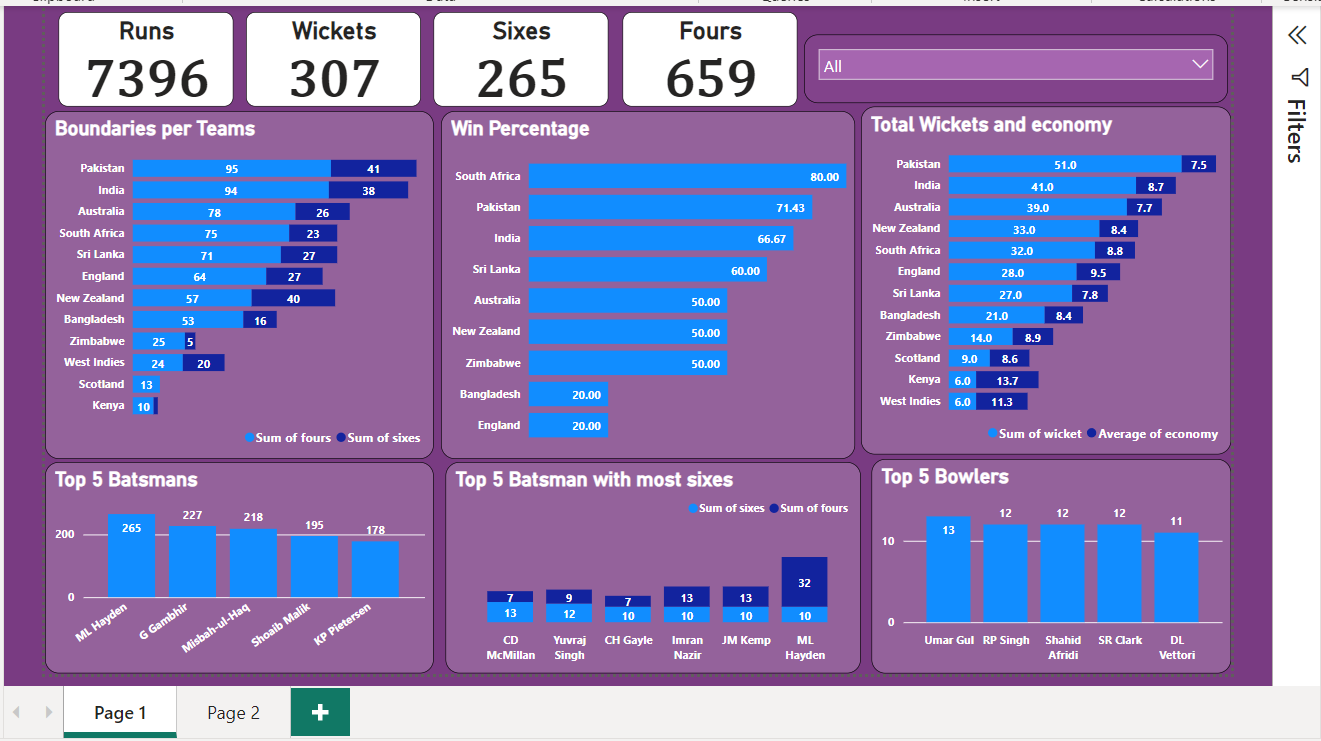

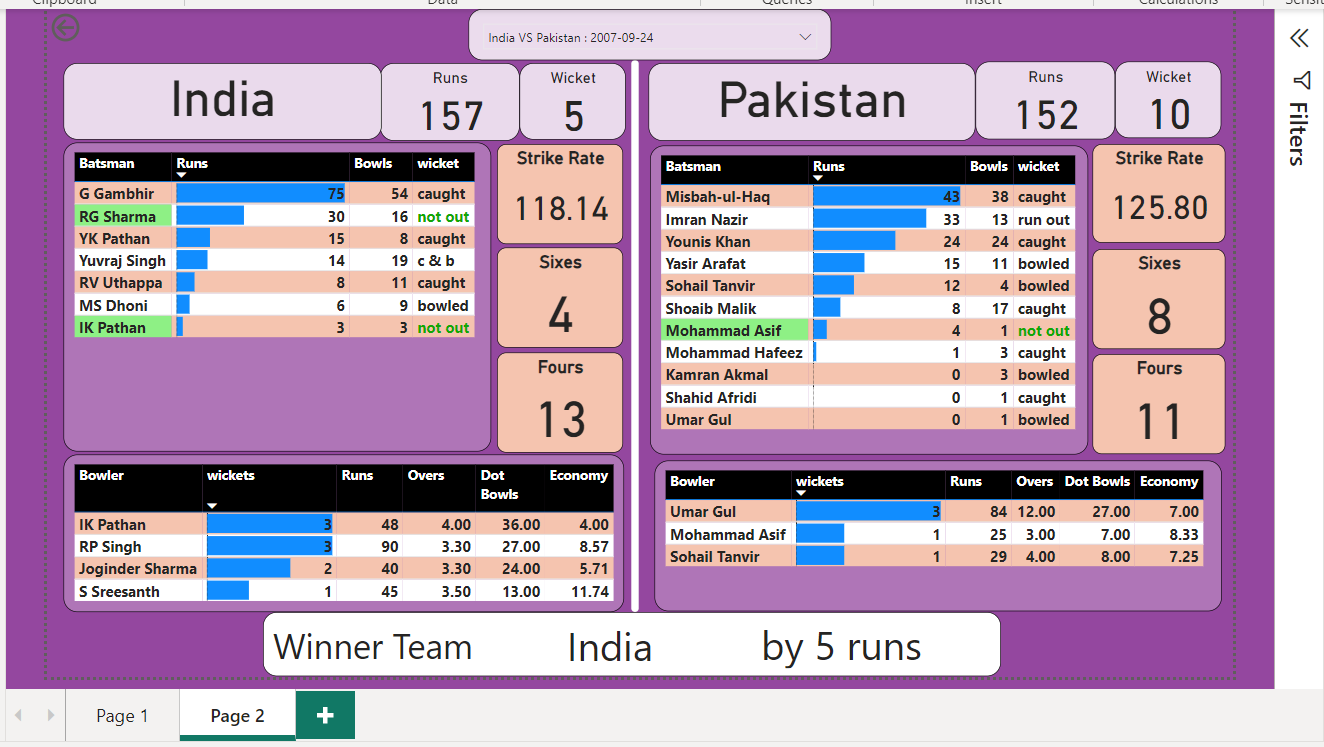